Importamos las librerias a usar

In [102]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

1. Preparamos los datos

In [103]:
data = pd.read_csv("insuf-car.csv", delimiter=",")
#quitamos la columna de time
data = data.drop(columns=["time"])
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


2. Preparamos en Dataset

In [104]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 468.9 KB

DATOS VACIOS
age                         

Verificamos que no haya datos NaN

In [105]:
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64


Dividimos el data set: 20 % para pruebas y 80 % para entrenamiento

In [106]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :11]  # Selecciona las columnas de la 0 a la 10 (11 columnas en total)
y_test = test_data.iloc[:, 11]   # Selecciona la columna 11 (la 12ª columna)

# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, :11]
y_train = train_data.iloc[:, 11]

m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el test son: {:.0f}".format(len(test_data)))

Datos de X_train:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4227  58.0        1                        57         0                 25   
4676  50.0        0                       196         0                 45   
800   50.0        0                       369         0                 40   
3671  42.0        0                        64         0                 40   
4193  42.0        0                       102         0                 25   
...    ...      ...                       ...       ...                ...   
4426  51.0        1                       582         1                 35   
466   65.0        1                       135         0                 35   
3092  50.0        1                       111         0                 20   
3772  80.0        0                       805         0                 38   
860   60.0        1                       315         1                 60   

      high_blood_pressure  platelets  serum_c

Implementacion de la regresion logistica

In [107]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar
    
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [108]:
#Normalizamos los datos
X_norm, mu, sigma = featureNormalize(X_train)

In [109]:
#Datos normalizados
X_norm

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
4227,-0.203031,1.052369,-0.534127,-0.880127,-1.114686,-0.763072,-0.775000,-0.077737,-1.074935,0.744313,1.505979
4676,-0.887595,-0.950237,-0.396562,-0.880127,0.637655,-0.763072,1.325718,0.209170,-0.178082,0.744313,1.505979
800,-0.887595,-0.950237,-0.225348,-0.880127,0.199570,-0.763072,-0.632232,-0.364645,0.270345,0.744313,-0.664020
3671,-1.572160,-0.950237,-0.527199,-0.880127,0.199570,-0.763072,-0.775000,-0.651552,0.718772,0.744313,-0.664020
4193,-1.572160,-0.950237,-0.489591,-0.880127,-1.114686,-0.763072,-0.214128,-0.173373,1.167199,-1.343521,-0.664020
...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.802025,1.052369,-0.014547,1.136200,-0.238515,-0.763072,-0.016722,0.113534,-0.178082,0.744313,1.505979
466,0.395963,1.052369,-0.456932,-0.880127,-0.238515,1.310493,-0.938162,-0.555916,-0.626508,0.744313,-0.664020
3092,-0.887595,1.052369,-0.480684,-0.880127,-1.552771,-0.763072,-0.560849,0.496077,0.046132,0.744313,-0.664020
3772,1.679522,-0.950237,0.206150,-0.880127,0.024336,-0.763072,-0.016722,-0.269009,-0.626508,0.744313,-0.664020


In [110]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 4000
n (número de columnas): 11


In [111]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_ready

array([[ 1.        , -0.20303067,  1.0523695 , ..., -1.07493538,
         0.74431281,  1.50597937],
       [ 1.        , -0.88759513, -0.95023659, ..., -0.17808154,
         0.74431281,  1.50597937],
       [ 1.        , -0.88759513, -0.95023659, ...,  0.27034538,
         0.74431281, -0.66401972],
       ...,
       [ 1.        , -0.88759513,  1.0523695 , ...,  0.04613192,
         0.74431281, -0.66401972],
       [ 1.        ,  1.67952159, -0.95023659, ..., -0.62650846,
         0.74431281, -0.66401972],
       [ 1.        , -0.03188956,  1.0523695 , ..., -1.29914884,
         0.74431281,  1.50597937]], shape=(4000, 12))

In [112]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con z=0, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de z.

In [113]:
# Prueba la implementacion de la funcion sigmoid
print(sigmoid(0))

0.5


In [114]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [115]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [116]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.01868223  0.62736745  0.17611574  0.32830624  0.00464765 -0.85572706
  0.30932612 -0.01907338  0.74721852 -0.29627739 -0.02479271  0.06528911]


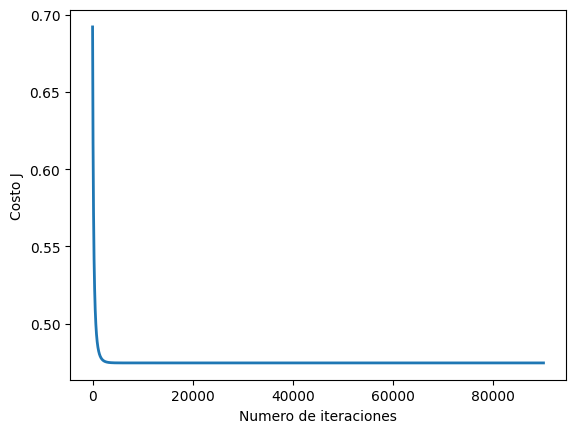

In [117]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 90000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

Test de validacion

In [118]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
1501,0.395963,1.052369,-0.258997,-0.880127,-0.238515,1.310493,-0.305907,-0.555916,-0.178082,-1.343521,-0.664020
2586,0.994957,1.052369,-0.481674,-0.880127,-1.114686,-0.763072,0.091801,-0.364645,0.718772,0.744313,1.505979
2653,0.823816,1.052369,-0.449015,-0.880127,1.951910,-0.763072,0.877021,-0.077737,0.046132,-1.343521,-0.664020
1055,0.652675,1.052369,-0.050176,-0.880127,-1.114686,1.310493,-1.009546,-0.364645,0.270345,0.744313,-0.664020
705,0.823816,-0.950237,0.021081,-0.880127,-0.238515,-0.763072,-0.815790,-0.269009,-0.626508,0.744313,1.505979
...,...,...,...,...,...,...,...,...,...,...,...
4711,0.652675,1.052369,0.419920,1.136200,-0.238515,-0.763072,0.061208,-0.269009,-0.626508,0.744313,-0.664020
2313,1.679522,-0.950237,-0.444066,1.136200,0.024336,-0.763072,-1.182906,0.496077,1.615626,0.744313,1.505979
3214,0.025186,1.052369,-0.441097,1.136200,0.199570,1.310493,-0.652628,-0.364645,-0.178082,-1.343521,-0.664020
2732,-0.117460,1.052369,-0.462870,-0.880127,0.637655,1.310493,0.989195,-0.269009,0.494559,0.744313,1.505979


Concatenamos con una columna de unos a la izquierda

In [119]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.          0.39596323  1.0523695  ... -0.17808154 -1.34352115
  -0.66401972]
 [ 1.          0.99495713  1.0523695  ...  0.7187723   0.74431281
   1.50597937]
 [ 1.          0.82381602  1.0523695  ...  0.04613192 -1.34352115
  -0.66401972]
 ...
 [ 1.          0.025186    1.0523695  ... -0.17808154 -1.34352115
  -0.66401972]
 [ 1.         -0.11746012  1.0523695  ...  0.49455884  0.74431281
   1.50597937]
 [ 1.          2.96307995  1.0523695  ...  0.27034538 -1.34352115
  -0.66401972]]


In [120]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [121]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de vivir %'])
df_pred['Probabilidad de vivir %'] = df_pred['Probabilidad de vivir %'].abs()

In [122]:
pd.set_option('display.max_columns', None)

In [123]:
X_columns = [
    'age',
    'anaemia',
    'creatinine_phosphokinase',
    'diabetes',
    'ejection_fraction',
    'high_blood_pressure',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'sex',
    'smoking'
]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columns)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(200)

,Valores del Y Reales,Probabilidad de vivir %,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0,39.378866,65.0,1.0,335.0,0.0,35.0,1.0,235000.0,0.8,136.0,0.0,0.0
1,1,48.479375,72.0,1.0,110.0,0.0,25.0,0.0,274000.0,1.0,140.0,1.0,1.0
2,1,7.778145,70.0,1.0,143.0,0.0,60.0,0.0,351000.0,1.3,137.0,0.0,0.0
3,1,62.707260,68.0,1.0,546.0,0.0,25.0,1.0,166000.0,1.0,138.0,1.0,0.0
4,0,35.017737,70.0,0.0,618.0,0.0,35.0,0.0,185000.0,1.1,134.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,20.530758,60.0,0.0,253.0,1.0,35.0,0.0,70000.0,1.7,140.0,1.0,0.0
196,0,19.917448,52.0,1.0,58.0,1.0,35.0,0.0,75000.0,1.4,136.0,0.0,0.0
197,1,6.793006,60.0,1.0,315.0,1.0,60.0,0.0,454000.0,1.1,131.0,1.0,1.0
198,0,11.479849,50.0,1.0,121.0,1.0,40.0,0.0,260000.0,0.7,130.0,1.0,0.0


Presición de nuestro modelo de regresion logaritmica
Usamos el metodo np.mean, la media (promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [124]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [125]:
# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))

Precisión de entrenamiento: 75.50 % 
